In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('WineQT.csv')

In [7]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1132,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.800000,5,1583
826,7.6,0.50,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.500000,6,1169
474,11.3,0.34,0.45,2.0,0.082,6.0,15.0,0.99880,2.94,0.66,9.200000,6,667
1053,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.800000,5,1476
168,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.900000,6,241
1052,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7,1475
670,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.900000,7,950
384,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.600000,5,540
711,7.5,0.71,0.00,1.6,0.092,22.0,31.0,0.99635,3.38,0.58,10.000000,6,1013
1063,5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.400000,5,1488


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


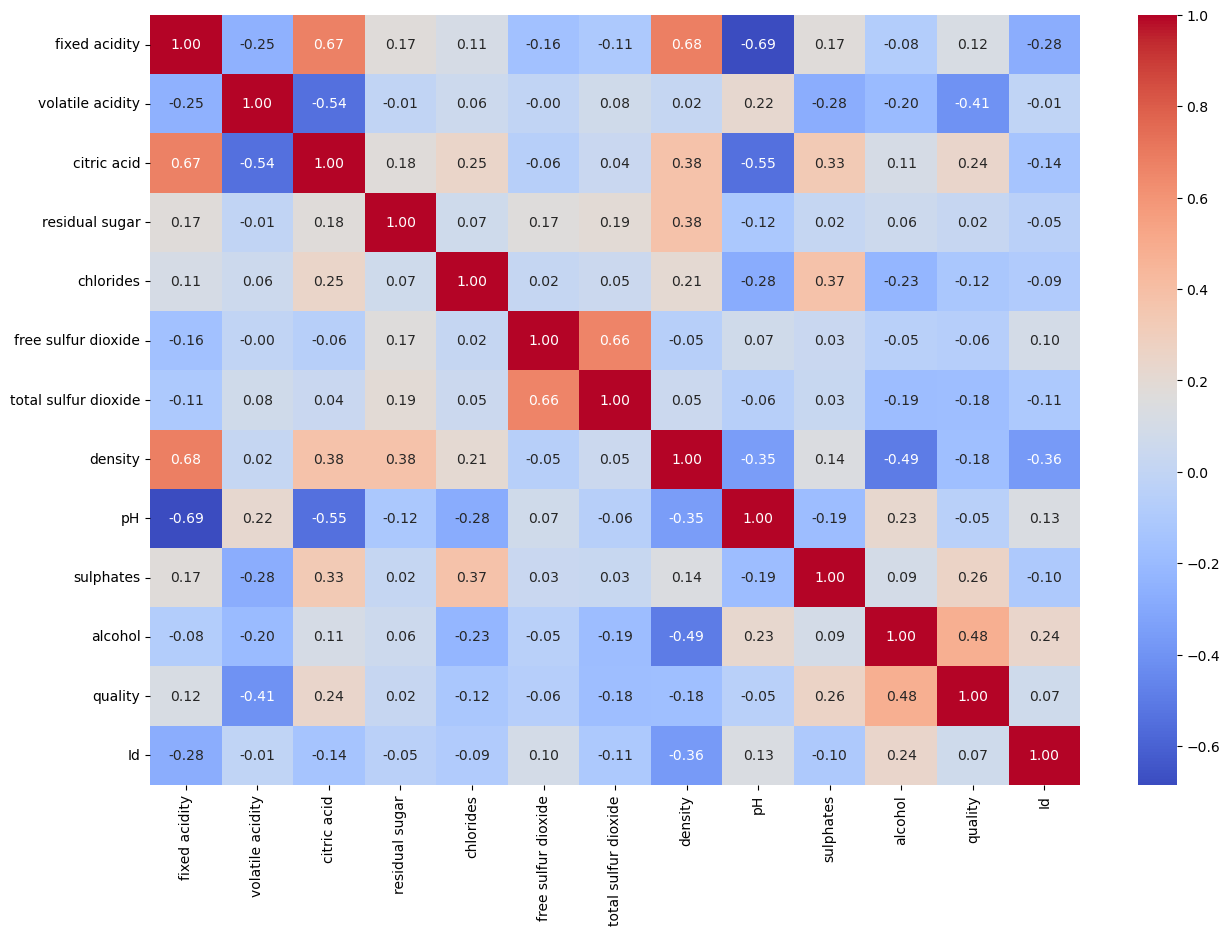

In [11]:
# Check correlation between numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [13]:
X = df.drop(columns=['quality'])
y = df['quality']

In [15]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = rf.predict(X_test) 

In [21]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MSE: 0.2979729257641922
R2 score: 0.46453299294085415


In [27]:
rf_parameters = RandomForestRegressor( 
    n_estimators=100,                  # Number of trees in the forest
    criterion='squared_error',          # Function to measure the quality of a split (mean squared error for regression)
    max_depth=None,                    # Maximum depth of the tree
    min_samples_split=2,               # Minimum number of samples required to split an internal node
    min_samples_leaf=1,                # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,      # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    max_features="sqrt",               # Number of features to consider when looking for the best split
    max_leaf_nodes=None,               # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,         # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,                    # Whether bootstrap samples are used when building trees
    oob_score=False,                   # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,                       # Number of jobs to run in parallel for both fit and predict
    random_state=42,                   # Seed used by the random number generator
    verbose=0,                         # Controls the verbosity when fitting and predicting
    warm_start=False,                  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    ccp_alpha=0.0                      # Complexity parameter used for Minimal Cost-Complexity Pruning
)

rf_parameters.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [29]:
y_pred = rf_parameters.predict(X_test)  

In [31]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))  

Mean Squared Error: 0.27828864628820965
R^2 Score: 0.49990628126927583


In [33]:
importances = rf.feature_importances_

In [35]:
feature_names = X_train.columns  
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

  
print(importances_df)

                 Feature  Importance
10               alcohol    0.272235
1       volatile acidity    0.151649
9              sulphates    0.137749
11                    Id    0.064129
6   total sulfur dioxide    0.063897
8                     pH    0.052149
4              chlorides    0.046914
7                density    0.044245
3         residual sugar    0.043196
0          fixed acidity    0.042025
2            citric acid    0.041621
5    free sulfur dioxide    0.040190


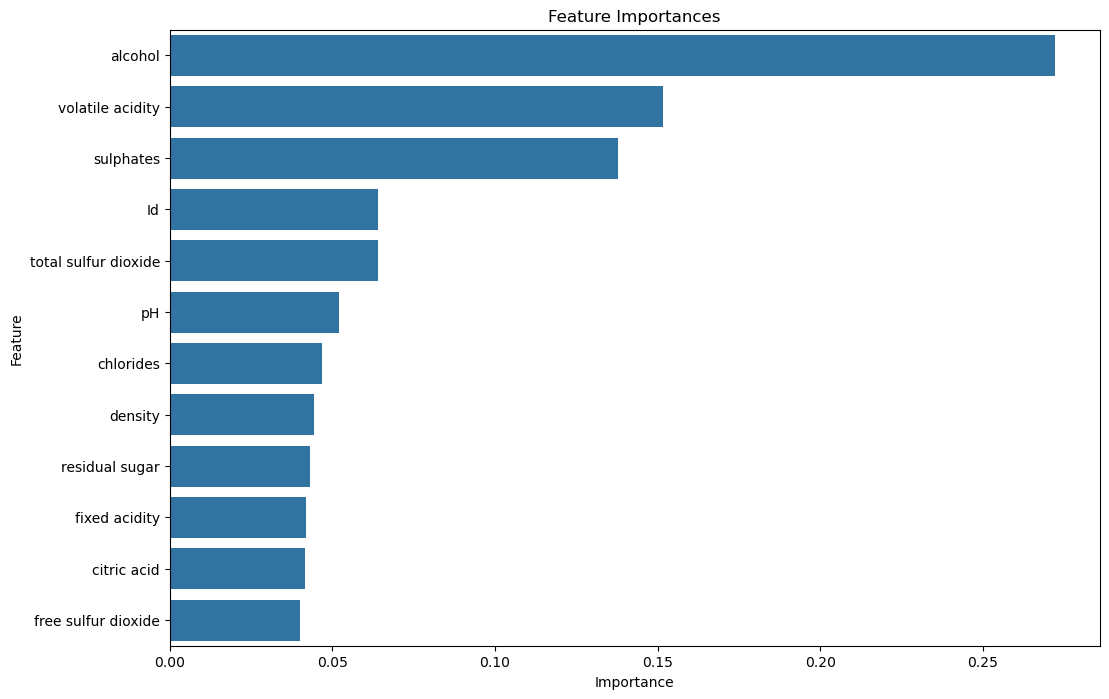

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature') 
plt.show() 